In [5]:
import pandas as pd
import logging
import torch
import pytorch_lightning as pl
from pathlib import Path
from torch.utils.data import DataLoader
import seisbench
import seisbench.models as sbm
from seisLM.evaluation import pick_eval

from seisLM.model import supervised_models

from seisLM.utils.project_path import gitdir
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt



data_aliases = {
    "ethz": "ETHZ",
    "geofon": "GEOFON",
    "stead": "STEAD",
    "neic": "NEIC",
    # "iquique": # Iquique is not included in the targets
    # "scedc": "SCEDC", # TODO: Something is wrong with the loading of this dataset
    # "instance": "InstanceCountsCombined", # TODO: Something is wrong with the loading of this dataset
}

## Baseline

In [2]:
model_name = 'PhaseNet'

for data_name in data_aliases.keys():
  pick_eval.save_pick_predictions(
    checkpoint_path_or_data_name=data_name,
    model_name=model_name,
    targets=f'/home/liu0003/Desktop/projects/seisLM/targets/{data_name}',
    sets='dev,test',
)

2024-05-31 20:53:06,671 | seisbench | WARNING | Check available storage and memory before downloading and general use of ETHZ dataset. Dataset size: waveforms.hdf5 ~22Gb, metadata.csv ~13Mb


Model trained on ETHZ for 100 epochs with a learning rate of 0.01.
Threshold selected for optimal F1 score on in-domain evaluation. Depending on the target region, the thresholds might need to be adjusted.
When using this model, please reference the SeisBench publications listed at https://github.com/seisbench/seisbench

Jannes Münchmeyer, Jack Woollam (munchmej@gfz-potsdam.de, jack.woollam@kit.edu)


Preloading waveforms: 100%|██████████| 3632/3632 [00:02<00:00, 1391.56it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_ethz/dev_task1.csv


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_ethz/dev_task23.csv


Preloading waveforms: 100%|██████████| 10485/10485 [00:11<00:00, 883.29it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_ethz/test_task1.csv


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_ethz/test_task23.csv
Model trained on GEOFON for 100 epochs with a learning rate of 0.001.
Threshold selected for optimal F1 score on in-domain evaluation. Depending on the target region, the thresholds might need to be adjusted.
When using this model, please reference the SeisBench publications listed at https://github.com/seisbench/seisbench

Jannes Münchmeyer, Jack Woollam (munchmej@gfz-potsdam.de, jack.woollam@kit.edu)


Preloading waveforms: 100%|██████████| 27685/27685 [00:04<00:00, 6095.44it/s] 
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_geofon/dev_task1.csv


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_geofon/dev_task23.csv


Preloading waveforms: 100%|██████████| 86261/86261 [00:14<00:00, 6069.04it/s] 
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_geofon/test_task1.csv


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_geofon/test_task23.csv
Model trained on STEAD for 100 epochs with a learning rate of 0.01.
Threshold selected for optimal F1 score on in-domain evaluation. Depending on the target region, the thresholds might need to be adjusted.
When using this model, please reference the SeisBench publications listed at https://github.com/seisbench/seisbench

Jannes Münchmeyer, Jack Woollam (munchmej@gfz-potsdam.de, jack.woollam@kit.edu)


Preloading waveforms: 100%|██████████| 63283/63283 [00:07<00:00, 8354.39it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_stead/dev_task1.csv


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_stead/dev_task23.csv


Preloading waveforms: 100%|██████████| 126566/126566 [00:15<00:00, 8200.58it/s] 
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_stead/test_task1.csv


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_stead/test_task23.csv
Model trained on NEIC for 100 epochs with a learning rate of 0.001.
Threshold selected for optimal F1 score on in-domain evaluation. Depending on the target region, the thresholds might need to be adjusted.
When using this model, please reference the SeisBench publications listed at https://github.com/seisbench/seisbench

Jannes Münchmeyer, Jack Woollam (munchmej@gfz-potsdam.de, jack.woollam@kit.edu)


Preloading waveforms: 100%|██████████| 122643/122643 [00:12<00:00, 9955.68it/s] 
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_neic/dev_task23.csv


Preloading waveforms: 100%|██████████| 255656/255656 [00:25<00:00, 9859.29it/s] 
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
2024-05-31 21:01:28,409 | seisbench | WARNING | Check available storage and memory before downloading and general use of Iquique dataset. Dataset size: waveforms.hdf5 ~5Gb, metadata.csv ~2.6Mb


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_neic/test_task23.csv
Model trained on Iquique for 100 epochs with a learning rate of 0.01.
Threshold selected for optimal F1 score on in-domain evaluation. Depending on the target region, the thresholds might need to be adjusted.
When using this model, please reference the SeisBench publications listed at https://github.com/seisbench/seisbench

Jannes Münchmeyer, Jack Woollam (munchmej@gfz-potsdam.de, jack.woollam@kit.edu)


Preloading waveforms: 100%|██████████| 4020/4020 [00:08<00:00, 474.07it/s]


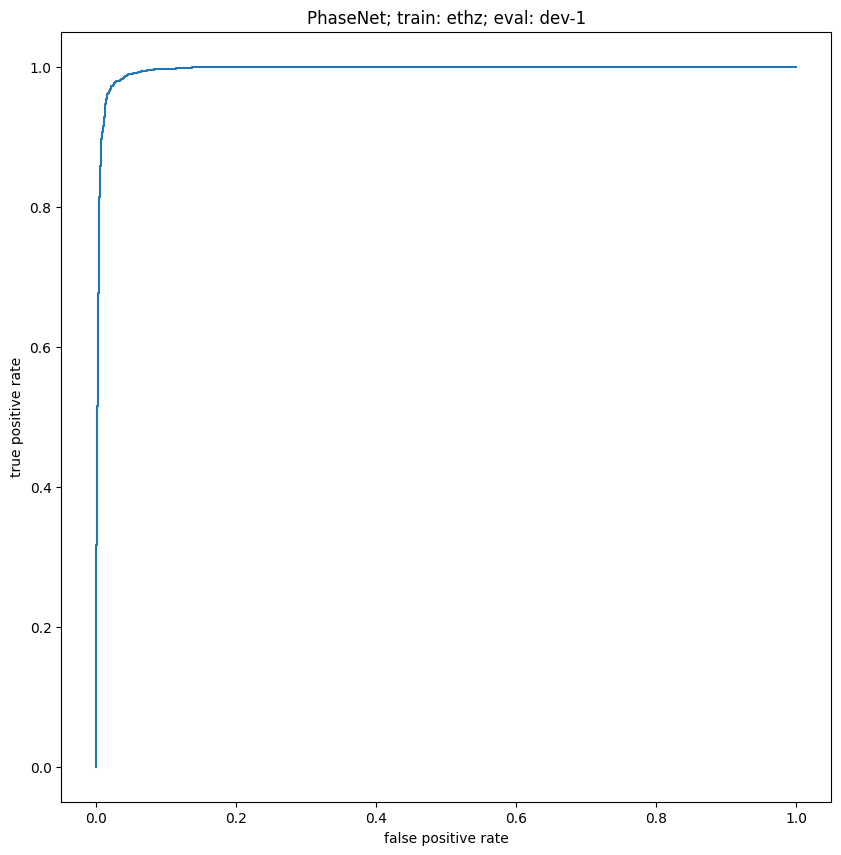

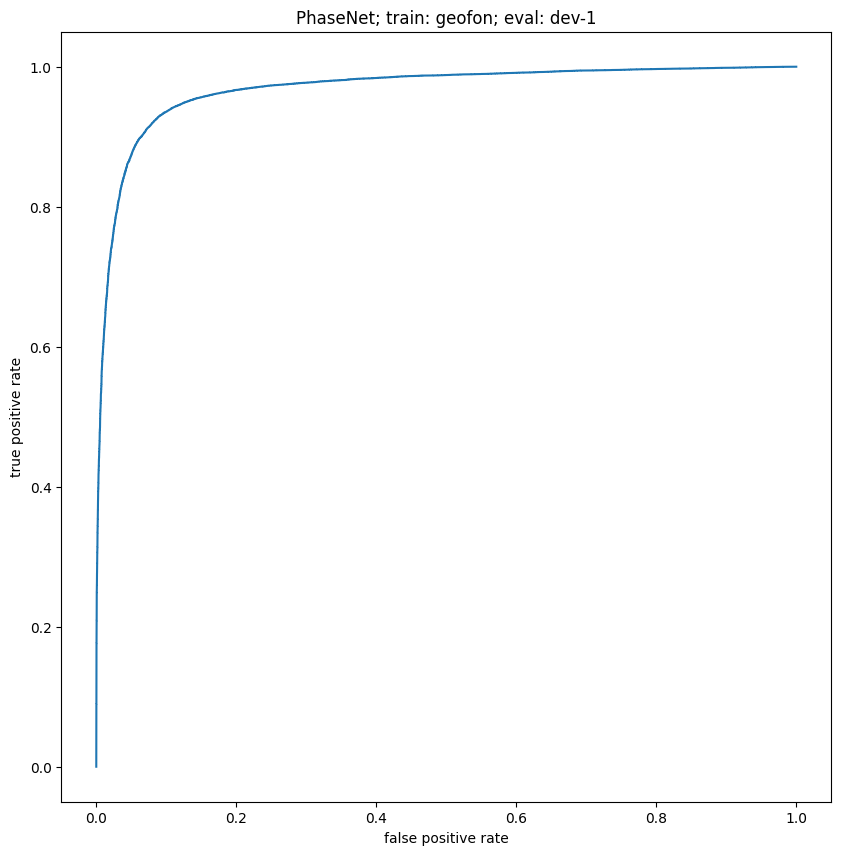

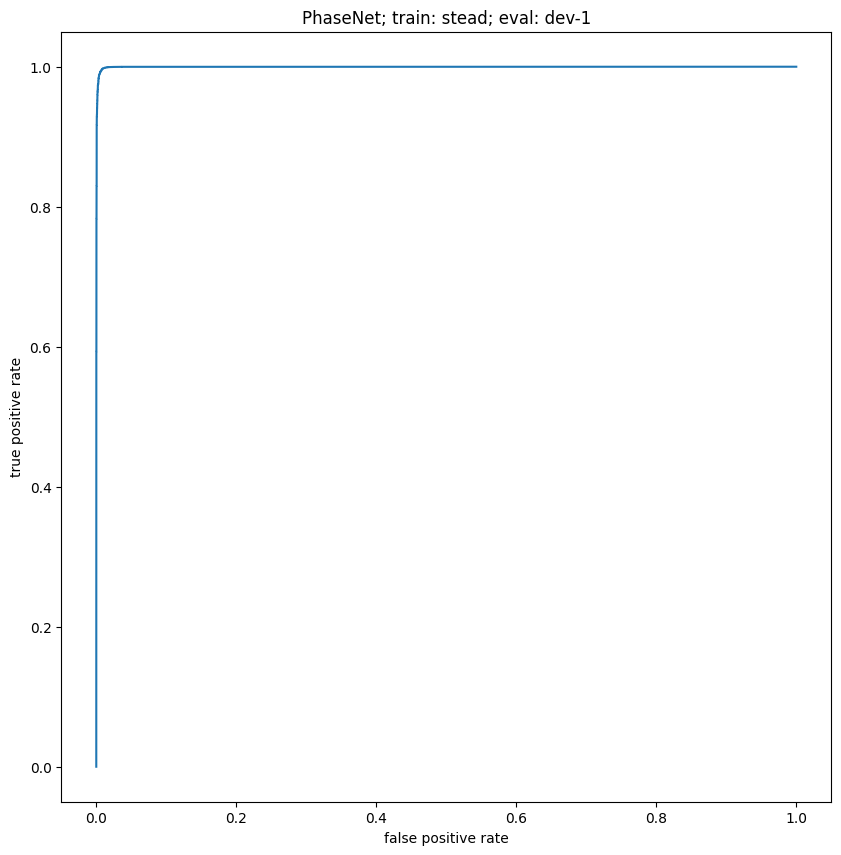

In [4]:
task = 1 # '23'
eval_set = 'dev' #'test'
model_name = 'PhaseNet'

for data_name in data_aliases.keys():

  if data_name == "neic":
    # NEIC does not have task 1 targets
    # https://dcache-demo.desy.de:2443/Helmholtz/HelmholtzAI/SeisBench/auxiliary/pick-benchmark/targets/neic/
    continue

  pred_path = (
    Path(gitdir())
    / "evaluation_results"
    / f"{model_name}_{data_name}"
    / f"{eval_set}_task{task}.csv"
  )


  pred = pd.read_csv(pred_path)

  pred["trace_type_bin"] = pred["trace_type"] == "earthquake"

  fpr, tpr, _ = roc_curve(pred["trace_type_bin"], pred["score_detection"])

  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111)
  ax.plot(fpr, tpr)
  ax.set_aspect("equal")

  ax.set_xlabel("false positive rate")
  ax.set_ylabel("true positive rate")
  ax.set_title(f"{model_name}; train: {data_name}; eval: {eval_set}-{task}")


dataset: ethz | phase P | MAE 0.08313075977882442
dataset: ethz | phase S | MAE 0.13480471168482605
dataset: geofon | phase P | MAE 0.4056478631131832
dataset: geofon | phase S | MAE 0.8570868500749624
dataset: stead | phase P | MAE 0.053622374419315416
dataset: stead | phase S | MAE 0.09245636274002135
dataset: neic | phase P | MAE 0.5922686761235366
dataset: neic | phase S | MAE 0.5352385057947705


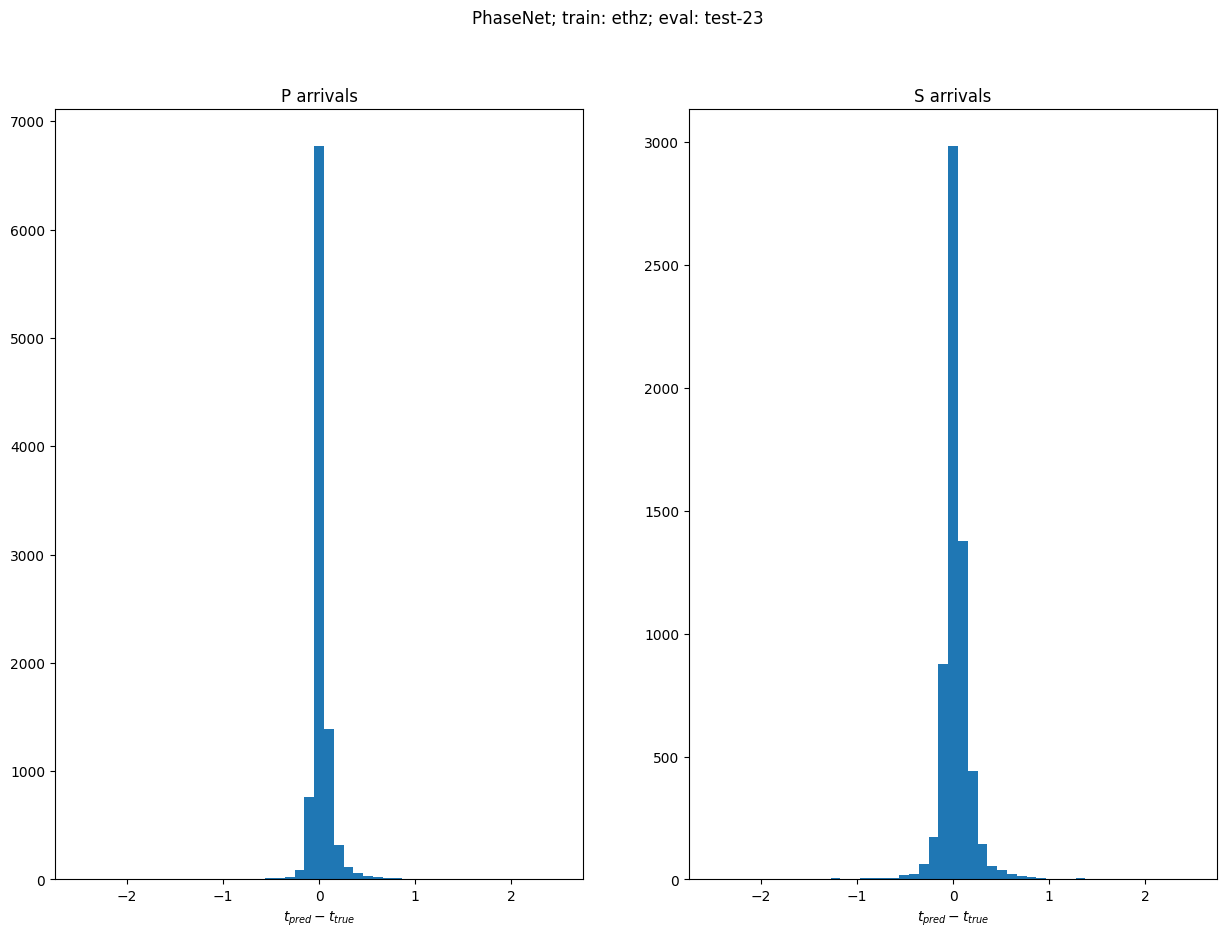

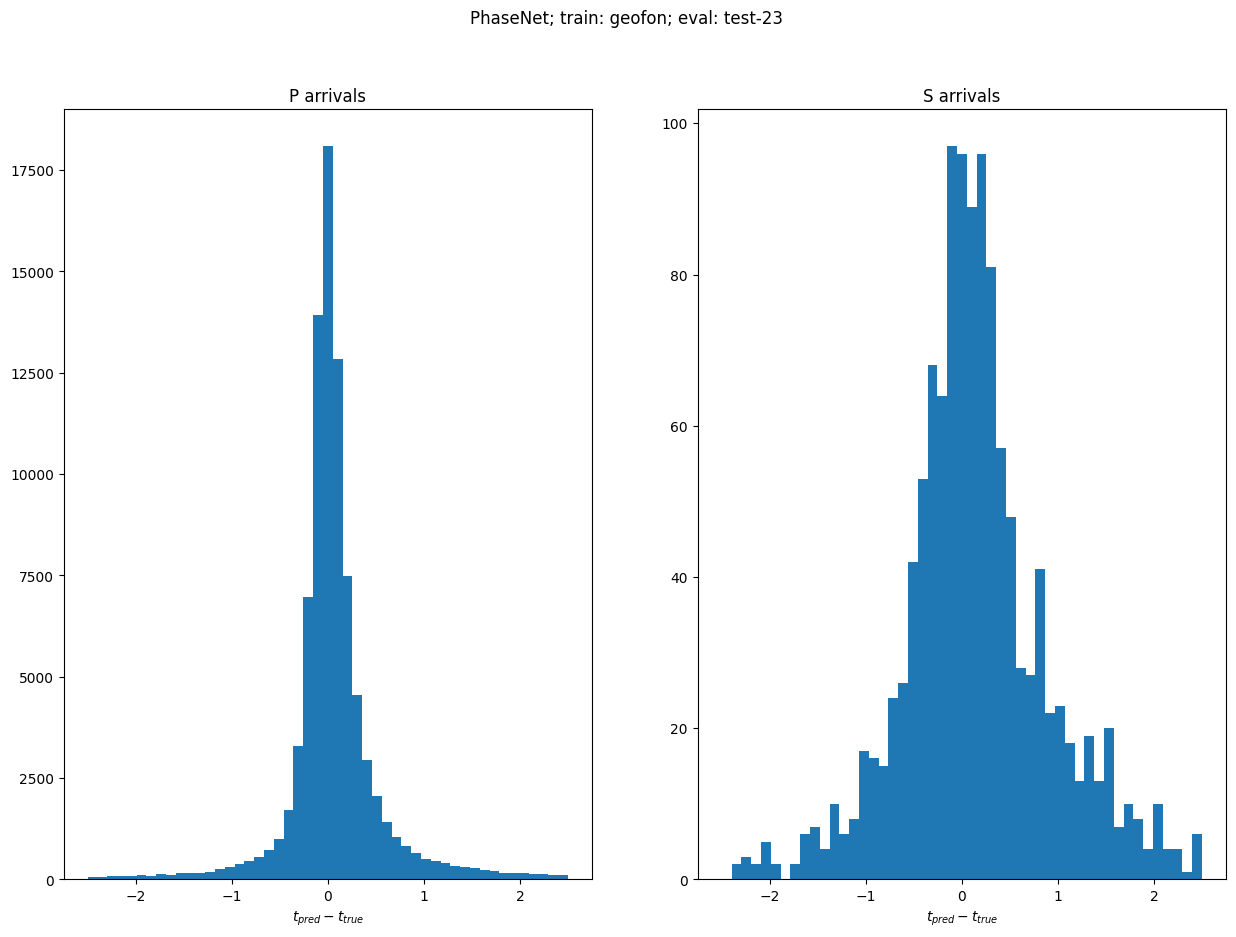

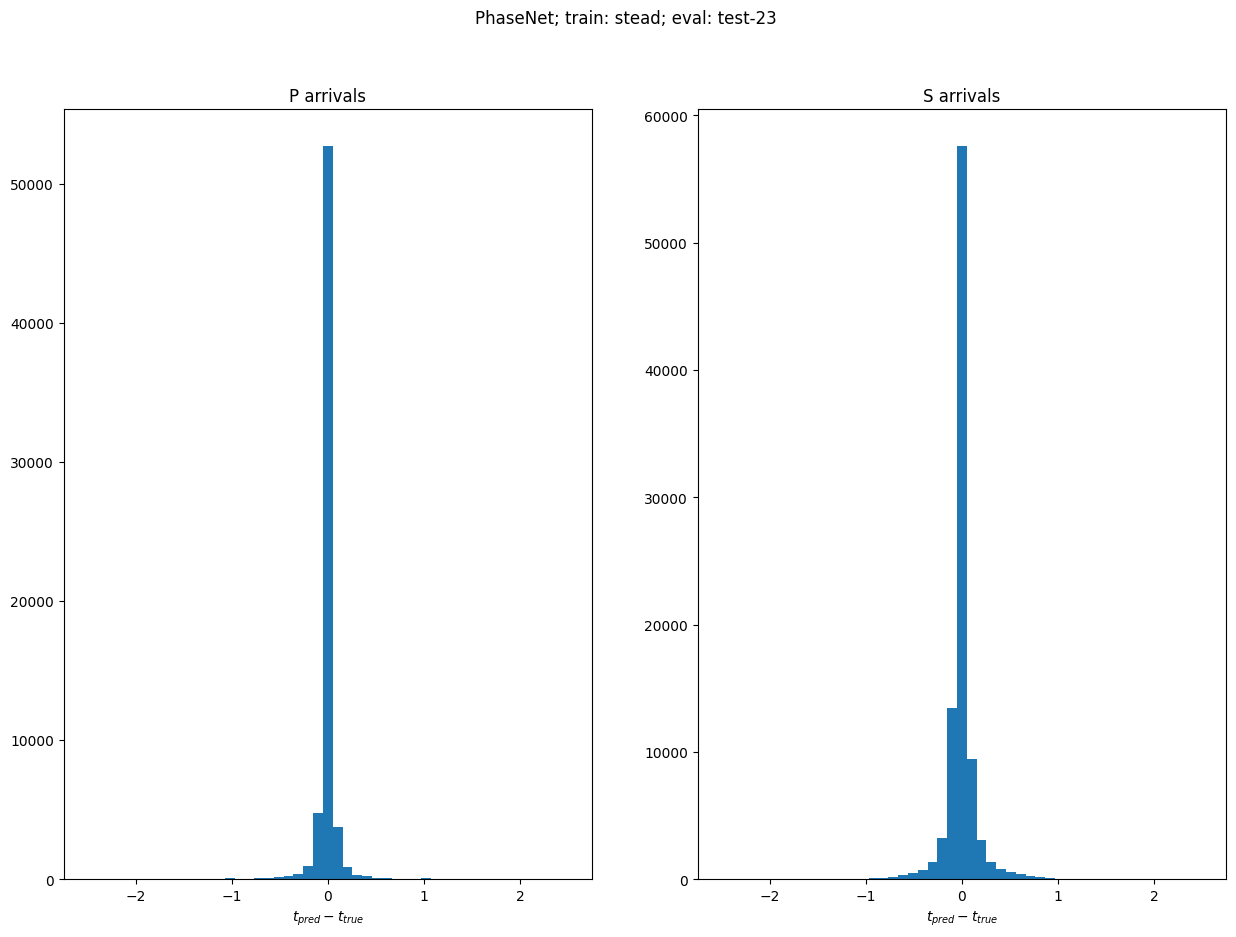

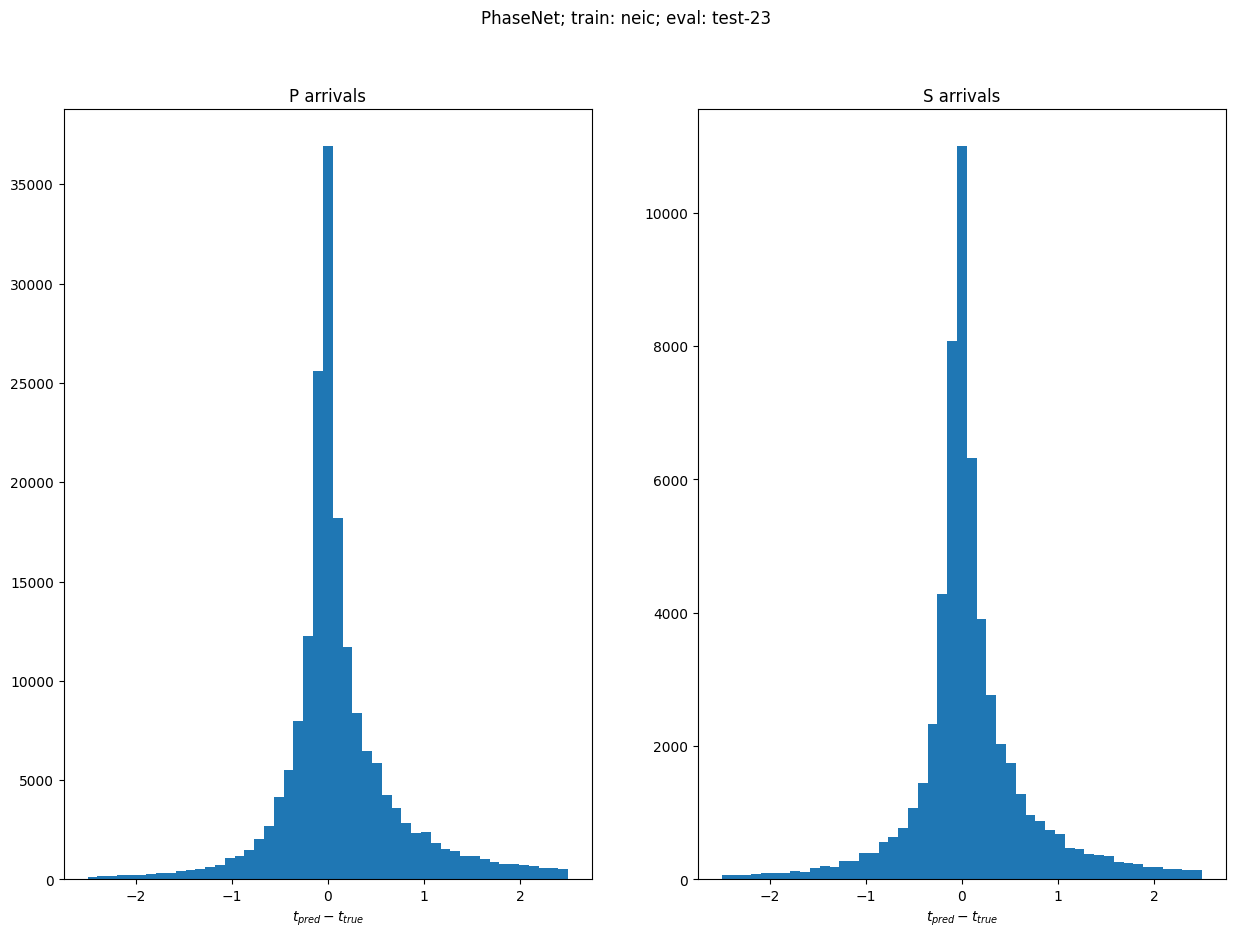

In [10]:
import numpy as np

task = 23
eval_set = 'test' #'test'

for data_name in data_aliases.keys():

  pred_path = (
    Path(gitdir())
    / "evaluation_results"
    / f"{model_name}_{data_name}"
    / f"{eval_set}_task{task}.csv"
  )

  pred = pd.read_csv(pred_path)


  fig = plt.figure(figsize=(15, 10))
  axs = fig.subplots(1, 2)

  for i, phase in enumerate(["P", "S"]):
      ax = axs[i]
      ax.set_title(f"{phase} arrivals")
      pred_phase = pred[pred["phase_label"] == phase]
      pred_col = f"{phase.lower()}_sample_pred"

      diff = (pred_phase[pred_col] - pred_phase["phase_onset"]) / pred_phase["sampling_rate"]

      print(f'dataset: {data_name} | phase {phase} | MAE {diff.abs().mean()}')
      bins = np.linspace(-2.5, 2.5, 50)
      ax.hist(diff, bins=bins)
      ax.set_xlabel("$t_{pred} - t_{true}$")
  plt.suptitle(f"{model_name}; train: {data_name}; eval: {eval_set}-{task}")
